In [1]:
from ultralytics import YOLO

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1. 初始化模型
# 加载一个预训练的YOLOv8实例分割模型。
# 'yolov8n-seg.pt' 是一个轻量级模型，适合快速实验。
# 如果你只想做目标检测，可以使用 'yolov8n.pt'。
#model = YOLO('yolov8n-seg.pt')
model = YOLO('models/yolov8n.pt')

In [8]:
# 存储每个 epoch 的指标和损失值
epoch_list = []
box_loss_list = []
cls_loss_list = []
seg_loss_list = []
map50_list = []
map50_95_list = []

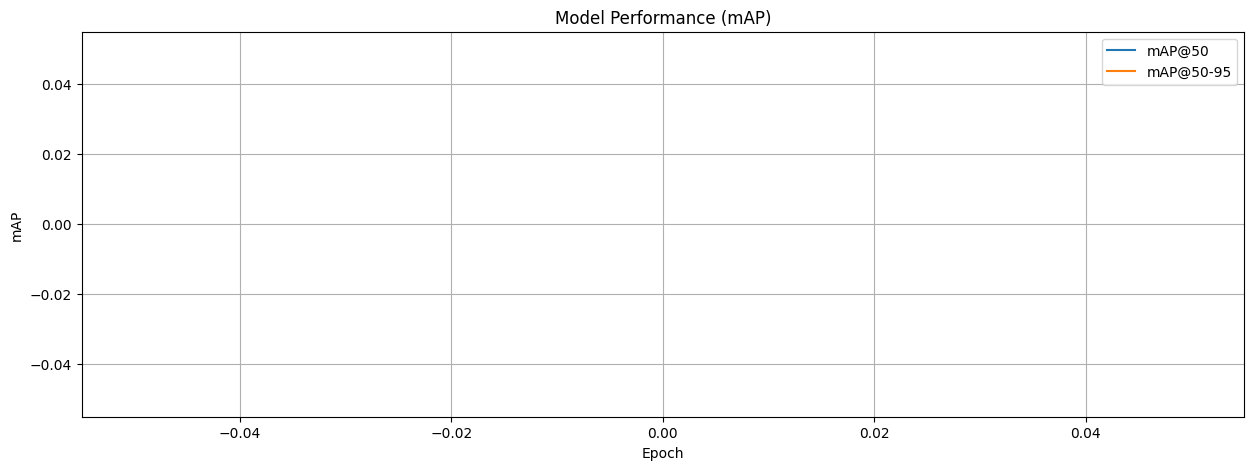

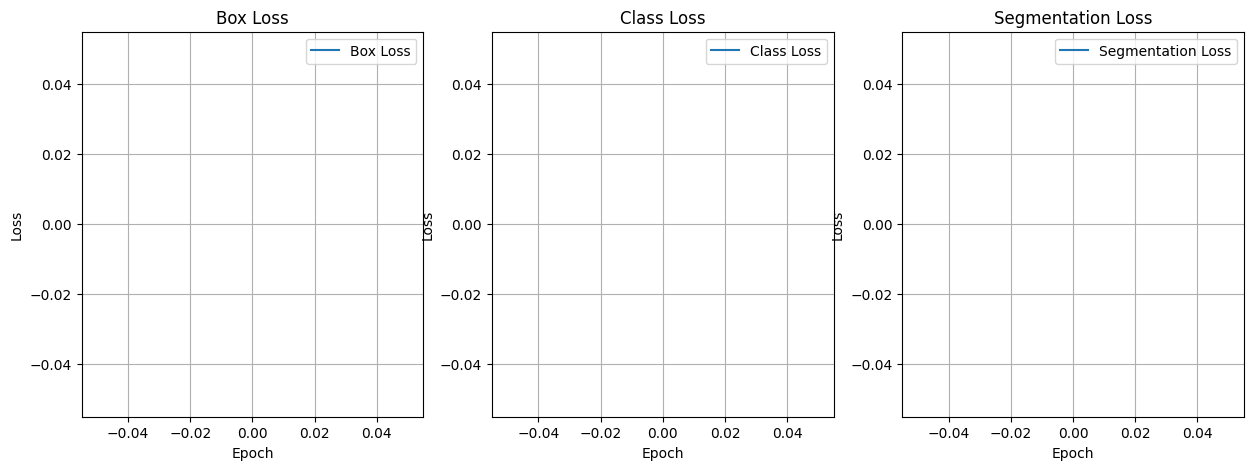

In [9]:
# 创建第一个图表：mAP曲线
plt.ion()  # 开启交互模式
fig1, axes1 = plt.subplots(1, 1, figsize=(15, 5))

# 配置 mAP 曲线子图
axes1.set_title('Model Performance (mAP)')
axes1.set_xlabel('Epoch')
axes1.set_ylabel('mAP')
axes1.grid(True)
map50_line, = axes1.plot([], [], label='mAP@50')
map50_95_line, = axes1.plot([], [], label='mAP@50-95')
axes1.legend()

# 创建第二个图表：损失曲线
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

# 配置 Box Loss 子图
axes2[0].set_title('Box Loss')
axes2[0].set_xlabel('Epoch')
axes2[0].set_ylabel('Loss')
axes2[0].grid(True)
box_line, = axes2[0].plot([], [], label='Box Loss')
axes2[0].legend()

# 配置 Class Loss 子图
axes2[1].set_title('Class Loss')
axes2[1].set_xlabel('Epoch')
axes2[1].set_ylabel('Loss')
axes2[1].grid(True)
cls_line, = axes2[1].plot([], [], label='Class Loss')
axes2[1].legend()

# 配置 Segmentation Loss 子图
axes2[2].set_title('Segmentation Loss')
axes2[2].set_xlabel('Epoch')
axes2[2].set_ylabel('Loss')
axes2[2].grid(True)
seg_line, = axes2[2].plot([], [], label='Segmentation Loss')
axes2[2].legend()

In [10]:
def on_train_epoch_end(trainer):
    """
    在每个 epoch 结束时被调用，用于更新两个图表的数据。
    """
    epoch = trainer.epoch
    metrics = trainer.metrics
    
    if metrics:
        # 获取训练指标和损失值
        box_loss = metrics.get('train/box_loss', 0)
        cls_loss = metrics.get('train/cls_loss', 0)
        seg_loss = metrics.get('train/seg_loss', 0)
        
        map50 = metrics.get('metrics/mAP50(B)', 0)
        map50_95 = metrics.get('metrics/mAP50-95(B)', 0)
        
        # 将当前 epoch 的值添加到列表中
        epoch_list.append(epoch + 1)
        box_loss_list.append(box_loss)
        cls_loss_list.append(cls_loss)
        seg_loss_list.append(seg_loss)
        map50_list.append(map50)
        map50_95_list.append(map50_95)
        
        # --- 更新第一个图表 (mAP) ---
        map50_line.set_xdata(epoch_list)
        map50_line.set_ydata(map50_list)
        map50_95_line.set_xdata(epoch_list)
        map50_95_line.set_ydata(map50_95_list)
        axes1.relim()
        axes1.autoscale_view()
        
        # --- 更新第二个图表 (损失) ---
        box_line.set_xdata(epoch_list)
        box_line.set_ydata(box_loss_list)
        
        cls_line.set_xdata(epoch_list)
        cls_line.set_ydata(cls_loss_list)
        
        seg_line.set_xdata(epoch_list)
        seg_line.set_ydata(seg_loss_list)
        
        for ax in axes2.flat:
            ax.relim()
            ax.autoscale_view()
            
        plt.tight_layout()
        plt.draw()
        plt.pause(0.001)

In [11]:
# 关键步骤：在训练前注册回调函数
model.add_callback('on_train_epoch_end', on_train_epoch_end)

In [12]:
results = model.train(
    data='./data.yaml',
    epochs=100,
    imgsz=128,
    device='cpu', #0 first GPU
    batch=4,
    #callbacks={'on_train_epoch_end': on_train_epoch_end} # register before train
    #lr0=0.01,   # 初始学习率
    #lrf=0.001,  # 最终学习率
    #optimizer='AdamW',  # 使用 AdamW 优化器
)

# 5. 训练后分析
# 训练完成后，你可以在 `results` 对象中找到更多信息。
# 比如 `results.plots` 包含了生成的各种图表（如损失曲线、mAP曲线等）。
# 训练好的模型权重文件通常保存在 `runs/segment/train/weights/best.pt`。

Ultralytics 8.3.143  Python-3.13.2 torch-2.7.0+cu118 CPU (Intel Core(TM) Ultra 5 135U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=models/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

train: Scanning C:\Drivers\01_code_template\010_computer_vision\02_case_defect_detection\200_method_yolo\dataset\train\labels... 39 images, 1 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 435.83it/s]

train: New cache created: C:\Drivers\01_code_template\010_computer_vision\02_case_defect_detection\200_method_yolo\dataset\train\labels.cache
val: Fast image access  (ping: 1.20.6 ms, read: 1.30.3 MB/s, size: 1.8 KB)



c:\Users\0185972\myenv\com\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Drivers\01_code_template\010_computer_vision\02_case_defect_detection\200_method_yolo\dataset\valid\labels... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<00:00, 486.07it/s]

val: New cache created: C:\Drivers\01_code_template\010_computer_vision\02_case_defect_detection\200_method_yolo\dataset\valid\labels.cache



c:\Users\0185972\myenv\com\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      2.326      3.632      1.128         10        128: 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         12         13    0.00566      0.231    0.00395    0.00154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      2.029      3.171      1.069         40        128: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         12         13     0.0102      0.538     0.0138    0.00475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.767      2.339      1.014          5        128: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         12         13     0.0168      0.923     0.0194    0.00886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.941      1.738      1.043         40        128: 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         12         13     0.0163          1     0.0517     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      2.077      1.817       1.04          8        128: 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         12         13      0.875       0.54      0.693       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      2.044      1.685      1.067         10        128: 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         12         13      0.515      0.231      0.551       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.958      1.421       1.01         43        128: 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         12         13      0.515      0.231      0.551       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.938      1.391     0.9553          3        128: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         12         13      0.529      0.538       0.44      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.944      1.417      1.054          6        128: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         12         13      0.696      0.692      0.623      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.894      1.482      1.075         14        128: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         12         13      0.696      0.692      0.623      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      2.065      1.354      1.071          9        128: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         12         13       0.89      0.769      0.863      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      2.127        1.2      1.083          8        128: 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         12         13      0.844      0.833      0.739      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      2.192      1.238       1.15         14        128: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         12         13      0.844      0.833      0.739      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.885      1.253      1.004         27        128: 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         12         13      0.787      0.692      0.779      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.982      1.414      1.095          3        128: 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         12         13      0.803      0.769       0.81      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G       1.88       1.22      1.034         14        128: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         12         13      0.803      0.769       0.81      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.933      1.222     0.9649          6        128: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         12         13      0.729      0.769      0.668      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      2.002      1.119      1.084         11        128: 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]

                   all         12         13      0.729      0.769      0.668      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.929      1.171     0.9884          4        128: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         12         13      0.509      0.769      0.548      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G       1.63      1.025     0.9954          7        128: 100%|██████████| 10/10 [00:03<00:00,  2.93it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         12         13      0.824      0.721      0.795      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.762      1.148      1.058          8        128: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all         12         13      0.824      0.721      0.795      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G       1.66     0.9543       1.02          4        128: 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         12         13      0.729      0.829      0.835      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.976       1.15      1.006          6        128: 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         12         13          1      0.817      0.891      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G       1.79      1.182      1.055          8        128: 100%|██████████| 10/10 [00:03<00:00,  2.64it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         12         13          1      0.817      0.891      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.788       1.13      1.085         16        128: 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]

                   all         12         13       0.92      0.923      0.919      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.947      1.107      1.138          9        128: 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]

                   all         12         13       0.92      0.923      0.919      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.585     0.8796     0.9972         11        128: 100%|██████████| 10/10 [00:02<00:00,  3.89it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all         12         13      0.877      0.846      0.854      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.858      1.014      1.005          8        128: 100%|██████████| 10/10 [00:02<00:00,  4.12it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.46it/s]

                   all         12         13      0.661        0.9      0.761      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.821      1.058      1.094         39        128: 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         12         13      0.661        0.9      0.761      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.584       0.95     0.9939          9        128: 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         12         13      0.718      0.692      0.744      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.827      1.015      1.019         12        128: 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         12         13      0.594      0.902      0.793       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G       1.72      1.039     0.9742         24        128: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         12         13      0.594      0.902      0.793       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.722     0.9513      1.027         10        128: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all         12         13      0.804      0.769       0.78      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.649      1.346     0.9575         25        128: 100%|██████████| 10/10 [00:03<00:00,  2.88it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         12         13      0.804      0.769       0.78      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.756     0.9245      0.973          6        128: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]

                   all         12         13      0.843      0.923      0.863      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.457      0.912     0.9734          4        128: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         12         13      0.869      0.846      0.883      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.691     0.9799      1.031          6        128: 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         12         13      0.869      0.846      0.883      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G       1.52     0.8916     0.9917          4        128: 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         12         13      0.919      0.879      0.901      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.594     0.9927     0.9331          5        128: 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all         12         13      0.845      0.923      0.913      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.503     0.9338     0.9855          4        128: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         12         13      0.845      0.923      0.913      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.932     0.9535     0.9695         31        128: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         12         13      0.878      0.923      0.913      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.759     0.9498     0.9835          9        128: 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]

                   all         12         13      0.878      0.923      0.913      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.485      0.905      1.002          9        128: 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         12         13      0.977      0.923      0.925      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      1.562     0.8728     0.9637          8        128: 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         12         13          1      0.832      0.891      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      1.719      1.049     0.9646          8        128: 100%|██████████| 10/10 [00:03<00:00,  2.92it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]

                   all         12         13          1      0.832      0.891      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.349     0.8482     0.9247          7        128: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         12         13          1      0.844      0.919      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.787      1.003      1.018         34        128: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]

                   all         12         13      0.996      0.846      0.919      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      1.664     0.9683     0.9966          3        128: 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         12         13      0.996      0.846      0.919      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      1.668     0.8913     0.9802         33        128: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.46it/s]

                   all         12         13      0.899      0.923      0.919      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.546     0.9303      1.005          7        128: 100%|██████████| 10/10 [00:02<00:00,  3.74it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         12         13      0.899      0.923      0.919      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.506     0.9502     0.9973          5        128: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         12         13      0.939      0.846      0.919      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.532     0.8739     0.9324          7        128: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         12         13          1      0.825      0.909      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      1.439     0.8547     0.9171         11        128: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all         12         13          1      0.825      0.909      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      1.732     0.9946      1.039         48        128: 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         12         13      0.974      0.923      0.925      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      1.581     0.8624     0.9682         23        128: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         12         13      0.988      0.846      0.902      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      1.488     0.8139     0.9288         10        128: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all         12         13      0.988      0.846      0.902      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      1.498     0.8696      1.013          5        128: 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         12         13          1      0.907      0.925      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      1.366     0.9235      1.016         13        128: 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         12         13          1      0.907      0.925      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      1.708      1.127      0.968          5        128: 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         12         13        0.9      0.923      0.919      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      1.678     0.8336      0.943         33        128: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         12         13      0.979      0.846      0.887      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      1.622      0.922     0.9062          5        128: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         12         13      0.979      0.846      0.887      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      1.681     0.8952     0.9313         22        128: 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         12         13          1      0.817      0.891      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      1.356     0.7968     0.9042          6        128: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         12         13      0.914      0.822      0.899      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      1.738     0.8421     0.9532          8        128: 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.19it/s]


                   all         12         13      0.914      0.822      0.899      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      1.277     0.7782      0.994         20        128: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         12         13      0.884      0.769      0.867       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      1.389       0.82     0.9431         10        128: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         12         13      0.884      0.769      0.867       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      1.593     0.8857     0.9363         25        128: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         12         13      0.838      0.846      0.878      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      1.303     0.7859     0.9652          9        128: 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         12         13      0.837      0.846      0.859      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      1.413      0.753     0.9441          7        128: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         12         13      0.837      0.846      0.859      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G      1.388     0.7238     0.9181          8        128: 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         12         13      0.837      0.846      0.859      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G      1.248      0.696     0.8879          9        128: 100%|██████████| 10/10 [00:03<00:00,  2.72it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         12         13      0.837      0.846      0.859      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      1.514     0.8648     0.9202         30        128: 100%|██████████| 10/10 [00:03<00:00,  2.63it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         12         13      0.837      0.846      0.859      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      1.423     0.9386     0.9563          5        128: 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         12         13      0.838      0.846      0.824      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      1.589     0.8184      0.914         35        128: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         12         13      0.838      0.846      0.824      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      1.612     0.8544     0.9577         12        128: 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         12         13      0.837      0.846      0.824      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      1.514     0.8373     0.9737          5        128: 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         12         13       0.83      0.846      0.828      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G       1.29     0.8166      1.017         31        128: 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         12         13       0.83      0.846      0.828      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      1.566      0.795     0.9311          6        128: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.01it/s]

                   all         12         13      0.783      0.833      0.851       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      1.468     0.7705     0.9445          3        128: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         12         13      0.806      0.769      0.847      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      1.369     0.7435      0.932         11        128: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.80it/s]

                   all         12         13      0.806      0.769      0.847      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      1.488     0.7759     0.9379         28        128: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         12         13      0.784       0.84      0.838      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      1.532     0.7925     0.8988          4        128: 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         12         13      0.784       0.84      0.838      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      1.305     0.8441     0.9222          5        128: 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         12         13      0.797      0.769       0.82      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G      1.353     0.7053     0.9503          8        128: 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]

                   all         12         13      0.801      0.769      0.746      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      1.399     0.8555     0.9047         21        128: 100%|██████████| 10/10 [00:03<00:00,  3.08it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         12         13      0.801      0.769      0.746      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      1.337     0.7219     0.8968          7        128: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         12         13       0.89      0.846      0.848      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G      1.361     0.7337     0.9779          8        128: 100%|██████████| 10/10 [00:03<00:00,  2.98it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         12         13      0.894      0.846      0.839      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      1.426     0.7258     0.8965         21        128: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         12         13      0.894      0.846      0.839      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G       1.32     0.7023     0.8764         25        128: 100%|██████████| 10/10 [00:02<00:00,  3.59it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         12         13      0.856      0.913      0.844      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      1.298     0.7312     0.9338          8        128: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         12         13      0.856      0.913      0.844      0.541


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


c:\Users\0185972\myenv\com\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
     91/100         0G       1.22     0.7669     0.8883          4        128: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all         12         13      0.856      0.913      0.844      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      1.068      0.668     0.8981          4        128: 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         12         13      0.856      0.913      0.844       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G      1.143     0.6761      0.891          3        128: 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all         12         13      0.856      0.913      0.844       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      1.108      0.717     0.9125          3        128: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all         12         13      0.896      0.846      0.839      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      1.201     0.6933     0.8874         20        128: 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         12         13      0.899      0.846      0.839      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      1.175     0.6848     0.8974         34        128: 100%|██████████| 10/10 [00:03<00:00,  2.68it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         12         13      0.899      0.846      0.839      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      1.146     0.7063     0.8596         50        128: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         12         13      0.901      0.846      0.839      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      1.232     0.7047     0.8907          4        128: 100%|██████████| 10/10 [00:03<00:00,  3.15it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         12         13      0.901      0.846      0.839      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G      1.243     0.7388     0.9318          4        128: 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]

                   all         12         13      0.901      0.846      0.839        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G      1.211     0.7113     0.9067          4        128: 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]


<Figure size 640x480 with 0 Axes>

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         12         13      0.903      0.846      0.835      0.492



100 epochs completed in 0.132 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.143  Python-3.13.2 torch-2.7.0+cu118 CPU (Intel Core(TM) Ultra 5 135U)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


                   all         12         13      0.845      0.923      0.913      0.623
Speed: 1.7ms preprocess, 33.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train


In [16]:
import pandas as pd
df = pd.read_csv('runs/detect/train/results.csv')


In [17]:

# 2. 创建一个包含两个子图的画布
# 第一个子图用于绘制 mAP 指标
# 第二个子图用于绘制损失值
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 3. 绘制 mAP 指标图
ax1.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
ax1.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
ax1.set_title('Model Performance (mAP)', fontsize=16)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('mAP', fontsize=12)
ax1.legend()
ax1.grid(True)

# 4. 绘制训练和验证损失图
ax2.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
ax2.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
ax2.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss')
ax2.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss')
ax2.set_title('Training and Validation Loss', fontsize=16)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend()
ax2.grid(True)

# 5. 优化布局并保存图表
plt.tight_layout()
#plt.savefig('training_metrics.png')

#print("图表已成功保存为 training_metrics.png")

<Figure size 640x480 with 0 Axes>

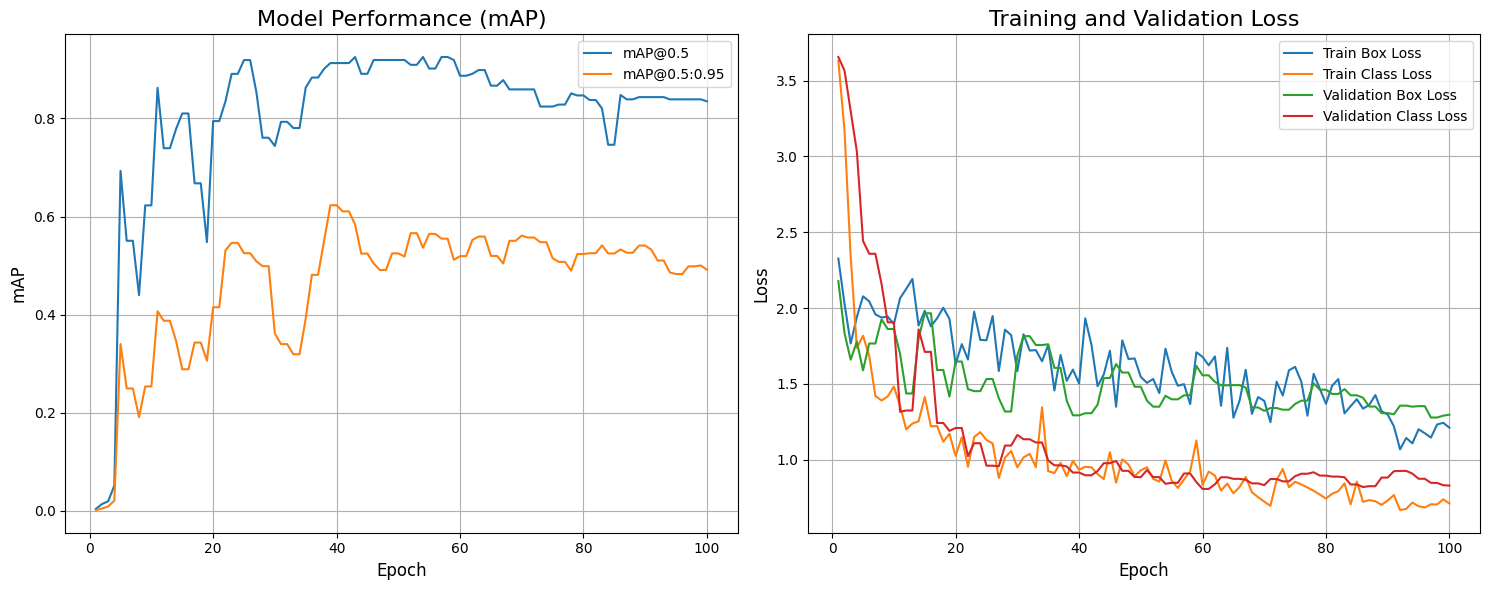

In [18]:
plt.show()

# predict

In [1]:
from ultralytics import YOLO
import os
def my_predict(image_folder_read):

    # 1. 加载你训练好的模型
    # 假设你的模型保存在 runs/detect/train/weights/best.pt
    model_path = 'runs/detect/train/best.pt' 
    # 请替换为你的模型路径，例如：'runs/detect/train/weights/best.pt'

    try:
        model = YOLO(model_path)
        print(f"成功加载模型: {model_path}")
    except FileNotFoundError:
        print(f"错误：未找到模型文件 {model_path}。请检查路径是否正确。")
        exit()

    # 2. 指定预测的图片源
    # 可以是单张图片、图片文件夹、视频文件或视频流
    # 例如：
    # source = 'path/to/your/image.jpg'
    # source = 'path/to/your/images_folder/'
    source = image_folder_read # 请替换为你的图片文件夹路径

    # 3. 进行预测并保存结果
    # YOLOv8 的 predict 方法非常方便，可以自动处理画框和保存
    results = model.predict(
        source=source,
        save=True,          # 自动保存结果图片
        conf=0.5,           # 设置置信度阈值，低于此值的检测结果将被忽略
        iou=0.45            # 设置 IoU 阈值，用于非极大值抑制（NMS）
    )

    # 4. (可选) 遍历结果
    # 你可以通过遍历 results 对象来获取每个图片的详细预测信息
    for result in results:
        # 获取图片路径
        im_file = result.path
        # 获取检测到的边界框
        boxes = result.boxes
        # 打印每个图片检测到的物体数量
        print(f"在图片 {os.path.basename(im_file)} 中检测到 {len(boxes)} 个物体。")

    print("\n预测完成。结果图片已保存到 runs/detect/predict 文件夹中。")

In [20]:
image_folder_read = r'C:\Drivers\01_code_template\010_computer_vision\02_case_defect_detection\02_pictures\ig2'

In [ ]:
my_predict(image_folder_read)

错误：未找到模型文件 path/to/your/best.pt。请检查路径是否正确。


UnboundLocalError: cannot access local variable 'model' where it is not associated with a value

: 